In [ ]:
from server import Scraper
from queue import Queue
from bs4 import BeautifulSoup as bs
s = Scraper(1,1)
# s.headers['headers']

q = Queue()
p = Queue()
q.put('https://www.xiaohongshu.com/user/profile/55707a7462a60c528846d736')
p.put({'userInfo':{'user-id':'adfasd'},'links':['/explore/611206df0000000021037225']})

# s.homePageScraper(q)
# s.updateCookie('https://www.xiaohongshu.com/user/profile/55707a7462a60c528846d736')
# s.userPageScraper(q,p,[])
s.postPageScrapers(p)

In [ ]:
homefeed_headers ={
  'authority': 'edith.xiaohongshu.com',
  'accept': 'application/json, text/plain, */*',
  'accept-language': 'en-US,en;q=0.9',
  'content-type': 'application/json;charset=UTF-8',
  'cookie': 'abRequestId=ef1bd787-1e79-58c8-8e89-8d418ad28617; webBuild=4.1.6; xsecappid=xhs-pc-web; a1=18d831d5293odpeew0f8ob347pawcu926mlx965b330000258170; webId=5c924541f0a24d617399187b0ef681d6; websectiga=3fff3a6f9f07284b62c0f2ebf91a3b10193175c06e4f71492b60e056edcdebb2; sec_poison_id=c2a0523a-307a-4bc6-90d2-14b0691016f3; gid=yYfYqyf2YYKjyYfYqyf2J6K2jqlfUddE8iYl1DqDq4WU0Cq8ES7jJj888J2YyW882iS2Sffy; web_session=030037a2f00f0f0d5613371dbb224a7353b69f; abRequestId=4cd36109-4b75-547a-be2a-9d570227b67a',
  'origin': 'https://www.xiaohongshu.com',
  'referer': 'https://www.xiaohongshu.com/',
  'sec-ch-ua': '"Not A(Brand";v="99", "Google Chrome";v="121", "Chromium";v="121"',
  'sec-ch-ua-mobile': '?0',
  'sec-ch-ua-platform': '"macOS"',
  'sec-fetch-dest': 'empty',
  'sec-fetch-mode': 'cors',
  'sec-fetch-site': 'same-site',
  'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36',
  'x-b3-traceid': '6b69e4e4d5060a73',
  'x-s': 'XYW_eyJzaWduU3ZuIjoiNTEiLCJzaWduVHlwZSI6IngxIiwiYXBwSWQiOiJ4aHMtcGMtd2ViIiwic2lnblZlcnNpb24iOiIxIiwicGF5bG9hZCI6ImFkNzNhMTA2MzNmOGM2MjM5MjUwODAwMDc4ODVjYjlmMjY5YzEwMmI4Zjc3MTEwN2NhYzVhZTc2NTczMWI2MjJlNDk3MWQ1ZWRhMWIzZGM4MjcyMGEyMjg2OTM2OGZiOWM5ZTNiZmRhMWZhYTFlYjkwZDc0YWEzMWI1NGM3MmNkMGQ3NGFhMzFiNTRjNzJjZGFjNDg5YjlkYThjZTVlNDhmNGFmYjlhY2ZjM2VhMjZmZTBiMjY2YTZiNGNjM2NiNWVkZWRiNWMzMWNhNTAzZWQ1Yzk1MzZlZDI4N2FjMjgxNmFhZjg1OTI5Yjc3OGEwMWIzYzQ5NGQ5YmYyY2Q4OGRmY2M0MWFmODgyM2FjMzM1OTM3ZWRhY2Y0ZDM0YWE0OWNmNDIxZWY1OWFjNGM2Y2JkNTRmY2M4YzkwZWY4NzcwMmFmZjc5NmFjMTU0ZDA0ZmFkNDUzMDBhMmNiMDdkYWU4NjczZTcwMTIyMjdlMjA0NzA0YmVlNTY4ZTIyODgwOCJ9',
  'x-s-common': '2UQAPsHCPUIjqArjwjHjNsQhPsHCH0rjNsQhPaHCH0P1+jhhHjIj2eHjwjQ+GnPW/MPjNsQhPUHCHdYiqUMIGUM78nHjNsQh+sHCH0c1Pah9HjIj2eLjwjHlwBchPAbD+/HEP9RDqBpS4AmfwBRjPAc7qBb7G7LEP08TJoWE+0pjPAPIPeZIP0LhP/qIHjIj2eGjw0r7PeqAPer7+/G7w/DVHdW7H0ijnbSgg9pEadkYp9zMp/+y4LSxJ9Swprpk/r+t2fbg8opnaBl7nS+Q+DS187YQyg4knpYs4M+gLnSOyLiFGLY+4B+o/gzDPS8kanS7ynPUJBEjJbkVG9EwqBHU+BSOyLShanS7yn+oz0pjzASinD+Q+DSTzfTw2DEi/pzmPDMC/fMOzFFU/nk++LMxpg4Ozrb7/Lz0+rRrpfk8yflT/nk8+pSCzg4+JLDFnfk0PFMLzg4wPDEingknybkLGAQwpB+C/p4QPDMxaflwzBVA/p4zPpkgLfY+pFSCnD4++rMxG7S+zFpE/nkdPDRL//QOzMkk/M4++pkL/fSyJpQi/p4yybSLzfl8yfT7nDz0PbSgzgk+pFDl/D4+PFMT/fT+zMrA/D4ByrMCzfSwpbQx/dktySkozfkwzBqMnnkVyMSLyBkypb8V/DziJLEozfM8yflin/QyyDFUpfY+ySkTnSzsyLMxn/Q8pbkk/D4wyDFU/fSwpM83nS4ayLEg/gk+pFEi/Szm2SkgL/b82fVl/gkyJbkra/zwPD8x/nkd2rETzfYyyfql/MzQ+pSxGA+OzFp7/p4Q2SSCL/pwzMrMnnM82pDUL/zOzMQTn/Q+PrMgzfMOzB4E//QByDMC//bOprFAnS4aybDUn/myzrFInp4bPrRg/fMwzrShnS48PLRgzfkwzFFUn/QtyFELLfM8PDFFngk34Mkgn/zw2f+7/nMBJpkxGApwJL8x/pzpPbkrc/myJL83/Dzp2DMrcfY+JLEk/LzDyMSgp/zwyf+CnSz04FMLagS+yfzV/nkmPrECc/m8Jp8V/Sz8+bkLagSOzB47/F+twaHVHdWhH0ija/PhqDYD87+xJ7mdag8Sq9zn494QcUT6aLpPJLQy+nLApd4G/B4BprShLA+jqg4bqD8S8gYDPBp3Jf+m2DMBnnEl4BYQyrkSL9E+zrTM4bQQPFTAnnRUpFYc4r4UGSGILeSg8DSkN9pgGA8SngbF2pbmqbmQPA4Sy9MaPpbPtApQy/8A8BE68p+fqpSHqg4VPdbF+LQfqLkQ4D8j/DlztMkc4A4Q2BzA2op7q0zl4BTQy7Q7anD6q9TyGA+QcFlDa/+O8/mM4BIUcLzyqFIM8Lz/ad+/Lo4GaLp9q9Sn4rkOLoqhcdp78SmI8BpLzb4OagWFpDSk4/8yLo4jadbFPrShaoS6/LbSpdpFpFS94dPlpdz1anD3aFSb2fbSJA8APeSoPnLI+g+84gzFqfQ68/mBzS4IwLTSPbSlLLShN9prLo4TanSt8n8l4rbCnS8n/7+M4FDA8BpL4gzmNMS98/G720YQybS0aLp+zFY6qS+QP7ZhwrS88FSbyrSs4g4/aL+ipjV6a9pDqepSP7bF4LDA+d+xG/4APB8H+rS3+npkqfFMa7b78DSka7+LJ78SPp+NqA+c4MmT8LRS8ob7pDDA+rlYp/8SL7b7y7kd8o+gpdc3a/+3aFShJnzAqgzTqSmFcfE1a/zTcLbAzB8d8gYn49QQyrkS8BEOq7YCn0FjNsQhwaHCP/rl+0PIweHFwaIj2erIH0il+dF=',
  'x-t': '1707301756799'
}
payload = "{\"cursor_score\":\"\",\"num\":31,\"refresh_type\":1,\"note_index\":0,\"unread_begin_note_id\":\"\",\"unread_end_note_id\":\"\",\"unread_note_count\":0,\"category\":\"homefeed_recommend\",\"search_key\":\"\",\"need_num\":6,\"image_formats\":[\"jpg\",\"webp\",\"avif\"]}"
comment_feeds ={}

x = {'x-b3-traceid': homefeed_headers["x-b3-traceid"],
  'x-s': homefeed_headers["x-s"], 
  'x-s-common':homefeed_headers["x-s-common"],
  'x-t':homefeed_headers["x-t"]} #homefeed
sss ={'x-b3-traceid': 'f433a53e8132d69a',
  'x-s': 'XYW_eyJzaWduU3ZuIjoiNTEiLCJzaWduVHlwZSI6IngxIiwiYXBwSWQiOiJ4aHMtcGMtd2ViIiwic2lnblZlcnNpb24iOiIxIiwicGF5bG9hZCI6IjhmYTllZGQxZWEzMDM0NmVmOGJmZjUxMTI1MjBiOTFhMjA5MzYxMzQwMzVmZDFiNWVmZmNjYWZjMTZlNGRmOGIwNTNhYzMzZTM3Y2UwNzk4NWZkNzNkNDI4MjAzNWI4NmM5ZTNiZmRhMWZhYTFlYjkwZDc0YWEzMWI1NGM3MmNkMGQ3NGFhMzFiNTRjNzJjZGFjNDg5YjlkYThjZTVlNDhmNGFmYjlhY2ZjM2VhMjZmZTBiMjY2YTZiNGNjM2NiNTI4YTQ2MWE0YTE5NDA1YTEzNmQwM2U3YzgxM2VkZDI5NWI4MDJlMTcyMGZiN2JhMmQ0ODFmYzdiY2JlMmIxMjNiN2RkNzk0ZjZhODRhNmJmODRlZmRhZGE1OGNiMTg5NGQ3YWFhNGQxNDM4MjA0ZDIzZDdkMDJjNzdiYWFlNjViMjEyZmNmM2VmM2U2ZTFiZGFkNDUzMDBhMmNiMDdkYWU3MGY3Yzc2OTA0OWQ1MmQ4ZDU4ZTNmYWEyNjczZWMwZSJ9',
  'x-s-common': '2UQAPsHCPUIjqArjwjHjNsQhPsHCH0rjNsQhPaHCH0P1+jhhHjIj2eHjwjQ+GnPW/MPjNsQhPUHCHdYiqUMIGUM78nHjNsQh+sHCH0c1Pah9HjIj2eLjwjHlwBchPe4Y8/cF8gZFq0p3y98T2BIl49YiyBkd+fbhq0bjqnTh+7cI4/PIPeZIP/PM+0GMHjIj2eGjw0r7PeqU+/W7+0rIw/WVHdW7H0ijnbSgg9pEadkYp9zMp/+y4LSxJ9Swprpk/r+t2fbg8opnaBl7nS+Q+DS187YQyg4knpYs4M+gLnSOyLiFGLY+4B+o/gzDPS8kanS7ynPUJBEjJbkVG9EwqBHU+BSOyLShanS7yn+oz0pjzASinD+Q+DSxyBM8pBlVnD4z2bkgzgk+zrFI/fMnJLRoafMyySph/pzQPLMxcfSOpr8i/nkm+LMCngY+2Sb7/gknJpkrzfSwpM8TnfMwySSgnfk+pbkV/D4aJLRoag4wprEingk+2SkL//+8PSp7/dk3+rEgnfTw2DE3/DzQ+rMxcgkwpFDF/fM++pkL/fSyJpQi/p4yybSLzfl8yfT7nDz0PbSgzgk+pFDl/D4+PFMT/fT+zMrA/D4ByrMCzfSwpbQx/dktySkozfkwzBqMnnkVyMSLyBkypb8V/DziJLEozfM8yflin/QyyDFUpfY+ySkTnSzsyLMxn/Q8pbkk/D4wyDFU/fSwprDFnpzzPDMgz/m8prLM/DzmPpSLzgkwJpb7//QpPMSC87Y+PS83nDzQ+LEga/z+zrkV/pz02LMonfSwPDki/nMzPrRrzfM82fzkn/QtJrMTagY+yDEk/0QayFECyAmyySki/FzayrETafMOzbQVnfMaybkoz/bOzFEk/pzd+LEoL/+8pF8i/D4z2rEr//z+yDrInDzQ2Skr8BT+zrkx/dkDypSgzflwyS8k/nkb2pkT/fM+PS8T//QpPSkLzfSyzF83/Dzp2DMrcfY+JLEk/LzDyMSgp/++zMDAngk0PDRLc/mOpMrl/nMz+bkrp/zyprETnp4b2LExG7kypFM7nS+twaHVHdWhH0ija/PhqDYD87+xJ7mdag8Sq9zn494QcUT6aLpPJLQy+nLApd4G/B4BprShLA+jqg4bqD8S8gYDPBp3Jf+m2DMBnnEl4BYQyrkSL98+zrTM4bQQPFTAnnRUpFYc4r4UGSGILeSg8DSkN9pgGA8SngbF2pbmqbmQPA4Sy9MaPpbPtApQy/8A8BE68p+fqpSHqg4VPdbF+LQfqLkQ4D8j/DlztMkc4A4Q2BzA2op7q0zl4BTQy7Q7anD6q9TyGA+QcFlDa/+O8/mM4BIUcLzyqFIM8Lz/ad+/Lo4GaLp9q9Sn4rkOLoqhcdp78SmI8BpLzb4OagWFpDSk4/8yLo4jadbFPrShaoS6/LbSpdpFpFS94dPlLoz1anD3aFSb2fbSJA8APeSoPnLI+g+84gzFqfQ68/mBzS4IwLTSPbSlLLShN9prLo4TanSt8n8l4rbCnS8n/7+M4FDA8BpL4gzmNMS98/G720YQyb+IaLpCzFW7/BTQPMPFwrS88FSbyrSs4g4/aL+ipjV6a9pDqepSP7bF4LDA+d+xG/4APB8H+rS3+npkqfFMa7b78DSka7+LJ78SPp+NqA+c4MmT8LRS8ob7pDDA+rlYp/8SL7b7y7mf/d+rLo4Aa/+VNFDAy7Y6qg4FGgp7JDH6G9EE/nRAyfbOq9Tn4sTQyURSzBb9qA8jGM4QyLbAydH9qA+sp04Qy9RSpb8FpFS3/rMcqg4w/dpFPLDA/9LlqgzfanTNqM8l49SQzg8A8b8FJozl49ES4g4maL+kcFShzBEocDSr+rS68/+M4rSQybmNanD98pSM4MbyGDplJ0ZIq9kSab+QzpSNLb87Lg+M4BbQyFkSpSm7zrTg87+3naRS+fQi/jHVHdWEH0iTP/HA+/GAweP7waIj2erIH0iU+oF=',
  'x-t': '1707258761098'} # comment

In [ ]:
from server import Scraper
import requests
# url = 'https://edith.xiaohongshu.com/api/sns/web/v2/comment/page?note_id=65b1e4fa000000000c006274&cursor=&top_comment_id=&image_formats=jpg,webp,avif'
url = "https://edith.xiaohongshu.com/api/sns/web/v1/homefeed"
s = Scraper(1,1)
header = s.headers['jsonHeaders']

x = {'x-b3-traceid': homefeed_headers["x-b3-traceid"],
  'x-s': homefeed_headers["x-s"], 
  'x-s-common':homefeed_headers["x-s-common"],
  'x-t':homefeed_headers["x-t"]} #homefeed

sss ={'x-b3-traceid': 'f433a53e8132d69a',
  'x-s': 'XYW_eyJzaWduU3ZuIjoiNTEiLCJzaWduVHlwZSI6IngxIiwiYXBwSWQiOiJ4aHMtcGMtd2ViIiwic2lnblZlcnNpb24iOiIxIiwicGF5bG9hZCI6IjhmYTllZGQxZWEzMDM0NmVmOGJmZjUxMTI1MjBiOTFhMjA5MzYxMzQwMzVmZDFiNWVmZmNjYWZjMTZlNGRmOGIwNTNhYzMzZTM3Y2UwNzk4NWZkNzNkNDI4MjAzNWI4NmM5ZTNiZmRhMWZhYTFlYjkwZDc0YWEzMWI1NGM3MmNkMGQ3NGFhMzFiNTRjNzJjZGFjNDg5YjlkYThjZTVlNDhmNGFmYjlhY2ZjM2VhMjZmZTBiMjY2YTZiNGNjM2NiNTI4YTQ2MWE0YTE5NDA1YTEzNmQwM2U3YzgxM2VkZDI5NWI4MDJlMTcyMGZiN2JhMmQ0ODFmYzdiY2JlMmIxMjNiN2RkNzk0ZjZhODRhNmJmODRlZmRhZGE1OGNiMTg5NGQ3YWFhNGQxNDM4MjA0ZDIzZDdkMDJjNzdiYWFlNjViMjEyZmNmM2VmM2U2ZTFiZGFkNDUzMDBhMmNiMDdkYWU3MGY3Yzc2OTA0OWQ1MmQ4ZDU4ZTNmYWEyNjczZWMwZSJ9',
  'x-s-common': '2UQAPsHCPUIjqArjwjHjNsQhPsHCH0rjNsQhPaHCH0P1+jhhHjIj2eHjwjQ+GnPW/MPjNsQhPUHCHdYiqUMIGUM78nHjNsQh+sHCH0c1Pah9HjIj2eLjwjHlwBchPe4Y8/cF8gZFq0p3y98T2BIl49YiyBkd+fbhq0bjqnTh+7cI4/PIPeZIP/PM+0GMHjIj2eGjw0r7PeqU+/W7+0rIw/WVHdW7H0ijnbSgg9pEadkYp9zMp/+y4LSxJ9Swprpk/r+t2fbg8opnaBl7nS+Q+DS187YQyg4knpYs4M+gLnSOyLiFGLY+4B+o/gzDPS8kanS7ynPUJBEjJbkVG9EwqBHU+BSOyLShanS7yn+oz0pjzASinD+Q+DSxyBM8pBlVnD4z2bkgzgk+zrFI/fMnJLRoafMyySph/pzQPLMxcfSOpr8i/nkm+LMCngY+2Sb7/gknJpkrzfSwpM8TnfMwySSgnfk+pbkV/D4aJLRoag4wprEingk+2SkL//+8PSp7/dk3+rEgnfTw2DE3/DzQ+rMxcgkwpFDF/fM++pkL/fSyJpQi/p4yybSLzfl8yfT7nDz0PbSgzgk+pFDl/D4+PFMT/fT+zMrA/D4ByrMCzfSwpbQx/dktySkozfkwzBqMnnkVyMSLyBkypb8V/DziJLEozfM8yflin/QyyDFUpfY+ySkTnSzsyLMxn/Q8pbkk/D4wyDFU/fSwprDFnpzzPDMgz/m8prLM/DzmPpSLzgkwJpb7//QpPMSC87Y+PS83nDzQ+LEga/z+zrkV/pz02LMonfSwPDki/nMzPrRrzfM82fzkn/QtJrMTagY+yDEk/0QayFECyAmyySki/FzayrETafMOzbQVnfMaybkoz/bOzFEk/pzd+LEoL/+8pF8i/D4z2rEr//z+yDrInDzQ2Skr8BT+zrkx/dkDypSgzflwyS8k/nkb2pkT/fM+PS8T//QpPSkLzfSyzF83/Dzp2DMrcfY+JLEk/LzDyMSgp/++zMDAngk0PDRLc/mOpMrl/nMz+bkrp/zyprETnp4b2LExG7kypFM7nS+twaHVHdWhH0ija/PhqDYD87+xJ7mdag8Sq9zn494QcUT6aLpPJLQy+nLApd4G/B4BprShLA+jqg4bqD8S8gYDPBp3Jf+m2DMBnnEl4BYQyrkSL98+zrTM4bQQPFTAnnRUpFYc4r4UGSGILeSg8DSkN9pgGA8SngbF2pbmqbmQPA4Sy9MaPpbPtApQy/8A8BE68p+fqpSHqg4VPdbF+LQfqLkQ4D8j/DlztMkc4A4Q2BzA2op7q0zl4BTQy7Q7anD6q9TyGA+QcFlDa/+O8/mM4BIUcLzyqFIM8Lz/ad+/Lo4GaLp9q9Sn4rkOLoqhcdp78SmI8BpLzb4OagWFpDSk4/8yLo4jadbFPrShaoS6/LbSpdpFpFS94dPlLoz1anD3aFSb2fbSJA8APeSoPnLI+g+84gzFqfQ68/mBzS4IwLTSPbSlLLShN9prLo4TanSt8n8l4rbCnS8n/7+M4FDA8BpL4gzmNMS98/G720YQyb+IaLpCzFW7/BTQPMPFwrS88FSbyrSs4g4/aL+ipjV6a9pDqepSP7bF4LDA+d+xG/4APB8H+rS3+npkqfFMa7b78DSka7+LJ78SPp+NqA+c4MmT8LRS8ob7pDDA+rlYp/8SL7b7y7mf/d+rLo4Aa/+VNFDAy7Y6qg4FGgp7JDH6G9EE/nRAyfbOq9Tn4sTQyURSzBb9qA8jGM4QyLbAydH9qA+sp04Qy9RSpb8FpFS3/rMcqg4w/dpFPLDA/9LlqgzfanTNqM8l49SQzg8A8b8FJozl49ES4g4maL+kcFShzBEocDSr+rS68/+M4rSQybmNanD98pSM4MbyGDplJ0ZIq9kSab+QzpSNLb87Lg+M4BbQyFkSpSm7zrTg87+3naRS+fQi/jHVHdWEH0iTP/HA+/GAweP7waIj2erIH0iU+oF=',
  'x-t': '1707258761098'} # comment

# headers.update(s.headers['x'])
header.update(x)
header['content-type']=s.headers['content_type']
header['cookie'] = s.headers['cookie']

response = requests.post(url,headers=homefeed_headers,data=payload).json()
print(response)
for i in response['data']['items']:
	print(i['note_card']['user']['user_id'])
# requests.get(url,headers=header).content.decode('utf-8')

In [ ]:
import json
h= json.load(open('headers.json','r'))
h['homeFeed_x'] = x
h['comment_x'] = sss
h['cookie'] = homefeed_headers['cookie']
h['payload'] = payload
open('headers.json','w').write(json.dumps(h,indent=4))

{'Date': 'Sat, 10 Feb 2024 22:02:19 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Server': 'openresty', 'Set-Cookie': 'abRequestId=0add8091-1517-591b-9e32-0fabd0e95e42; path=/; expires=Sun, 09 Feb 2025 22:02:19 GMT; domain=xiaohongshu.com', 'Content-Encoding': 'gzip', 'Access-Control-Allow-Origin': '0', 'Access-Control-Allow-Credentials': 'true', 'Access-Control-Allow-Methods': 'GET,OPTIONS', 'Access-Control-Max-Age': '86400', 'XHS-REQUEST-TIME': '0.052'}
{'authority': 'www.xiaohongshu.com', 'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7', 'accept-language': 'en-US,en;q=0.9', 'cache-control': 'no-cache', 'pragma': 'no-cache', 'sec-ch-ua': '"Not A(Brand";v="99", "Google Chrome";v="121", "Chromium";v="121"', 'sec-ch-ua-mobile': '?0', 'sec-ch-ua-platform': '"macOS"', 'sec-fetch-dest': 'document', 'sec-fetch-mode': 'navigate', 
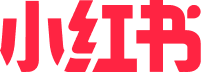

In [1]:
from copy import deepcopy
import requests
from server import Scraper
from bs4 import BeautifulSoup as bs
s = Scraper(1,1)
headers = deepcopy(s.headers['htmlHeaders'])

# url = 'https://www.xiaohongshu.com/user/profile/55707a7462a60c528846d736'
url = 'https://www.xiaohongshu.com/explore'
requests.get(url,headers = headers).status_code == 200
hd= requests.get(url,headers = headers).headers
print(hd)
ad = hd['Set-Cookie'].split('; ')[0]
res = [ad] + s.headers['cookie'].split('; ')[1:]
# res = ad
nc = '; '.join(res)

headers['cookie'] = s.headers['cookie']
print(headers)
# requests.get(url,headers=nh).headers
html = bs(requests.get(url,headers=headers).content,'html.parser')
# userlinks = ['https://www.xiaohongshu.com'+title['href']for title in html.findAll('a',class_='author')]
# userlinks
print(html.prettify())

# open('a.html','w').write(html.prettify())

In [ ]:
ad = hd['Set-Cookie'].split('; ')[0]
res = [ad] + s.headers['cookie'].split('; ')[1:]
'; '.join(res)